In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Comparing Two Samples
Let's walk through these two functions together

In [29]:
def difference_of_means(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [30]:
def one_simulated_difference(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups after shuffling labels
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(
        with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(
        shuffled_table, numeric_label, 'Shuffled Label')

(back to slides)
# Randomized Control Trial
Let's look at the example from the textbook the discusses whether
botulinum toxin A causes pain relief

The data is stored in a csv file named `bta.csv`.
How can we load in the data?

In [18]:
bta = ...
bta.show(5)

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0


**QUESTION:** What do the columns and values represent?

What table function can we use to help us figure this out? 

*Hint: what function shows us the statistics about the values a column has?*

<details>
<summary>Solution</summary>
  botox.pivot('Result', 'Group')
</details>

**QUESTION:** What statistic should we use here to see a difference between the groups?

<details>
<summary>Review</summary>
  ![title](hypothesis_testing_stat_review.png)
</details>


<details>
<summary>Solution</summary>
  difference of means
</details>

**QUESTION:** How do we compute that difference?

<details>
<summary>Solution</summary>
  botox.group('Group', np.average)
    
  tmp_tbl = botox.group('Group', np.average)
    tmp_tbl.column(1).item(1) - tmp_tbl.column(1).item(0)
</details>


Group,Result average
Control,0.125
Treatment,0.6


0.475

##  Testing the Hypothesis

**Question:** How can we use the functions from the top?
<details>
<summary>Solution</summary>
  difference of means(botox, 'Result', 'Group')
</details>  

In [86]:
observed_diff = ...
observed_diff

Ellipsis

**Question:** How can we simulate this statistic once?
<details>
<summary>Solution</summary>
  one_simulated_difference(botox, 'Result', 'Group')
</details> 


0.08750000000000002

Now let's simulate that 10k times

In [ ]:
# answer is below





















In [35]:
simulated_diffs = make_array()


for i in np.arange(10000):
    sim_diff = one_simulated_difference(botox, 'Result', 'Group')
    simulated_diffs = np.append(simulated_diffs, sim_diff)


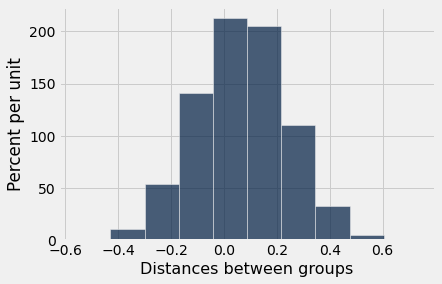

In [36]:
col_name = 'Distances between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)

**Question:** Where is the observed statistic?

Which of the following is our p-value?

In [40]:
# p-value1
p_1 = sum(simulated_diffs >= observed_diff)/len(simulated_diffs)

# p-value2
p_2 = sum(simulated_diffs <= observed_diff)/len(simulated_diffs)

p_1, p_2

(0.0076, 0.9991)

**Question:** Is this statistically significant?

(back to slides)
# Percentiles

In [8]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)

In [9]:
# Step 1. Sort the data
np.sort(x)

array([ 7, 20, 28, 34, 43, 51])

In [13]:
# Step 2. Figure out where 55th percentile would be.
# The Xth percentile is first value on the sorted list that is at least as large as X% of the elements 

28.05

In [12]:
# OR: 1 Line of Code using percentile()
percentile(55, x)

34

(back to slides)
## Percentiles questions

In [41]:
s= [1, 7, 3, 9, 5]

In [42]:
#1 
percentile(10, s) == 0

False

In [43]:
# 2 
percentile(39, s) == percentile(40, s)

True

In [44]:
# 3
percentile(40, s) == percentile(41, s) 

False

In [45]:
# 4
percentile(50, s) == 5 

True

# Estimation

### Sample Median

In [80]:
sf = Table.read_table('san_francisco_2015.csv')
sf.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2


**Question:** What is this dataset?

In [62]:
# We only care about salary for now
salary_sf = sf.select(3, 11, 21)
salary_sf

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,117767
"Public Works, Transportation & Commerce",Soft Floor Coverer,41209.8
Community Health,Health Care Billing Clerk 2,110561
Community Health,Food Service Mgr Administrator,38625
"Public Works, Transportation & Commerce",School Crossing Guard,11438.2
Public Protection,Police Officer,3188.65
Community Health,Nurse Practitioner,260281
"Public Works, Transportation & Commerce",Transit Operator,111057
General Administration & Finance,Attorney (Civil/Criminal),186781
Human Welfare & Neighborhood Development,Emp & Training Spec 2,103610


**Question:** Who is making the most money?

**Question:** Who is making the least money?

In [51]:
min_salary = 10 * 20 * 52
sf = sf.where('Total Compensation', are.above(min_salary))

**Question:** What is the typical salary? Should we compute the mean or median for this?

In [ ]:
# skip

In [ ]:
# skip

How can we compute the median with what we covered today?
<details>
<summary>Solution</summary>
  percentile(50, sf.column('Total Compensation'))
</details>  

In [66]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

98174.9

/opt/anaconda3/envs/bc-coms-1016/lib/python3.8/site-packages/datascience/tables.py:3220: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


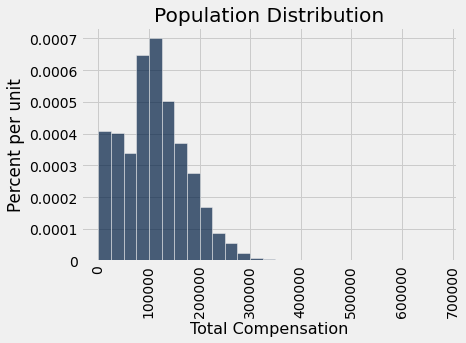

In [55]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)
plots.title('Population Distribution');

### Estimating Salaries
Say we dont have salaries. What would we do to compute the 50% percentile of salaries?

*Zoom poll*

In [65]:
# skip
#skip










In [53]:
our_sample = sf.sample(300, with_replacement=False)
our_sample.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,28536,70419.7,20364.5,6582.63,97366.8,15832.7,8888.29,1652.62,26373.6,123740
Calendar,2015,1,Public Protection,SHF,Sheriff,498,Deputy Sheriffs' Association,8300,Correction & Detention,8302,Deputy Sheriff 1,2673,29233.8,944.4,1674.93,31853.1,6932.84,4778.65,2451.71,14163.2,46016.3
Calendar,2015,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",1406,Senior Clerk,12416,23664.5,0,0,23664.5,5203.86,5734.39,1914.78,12853,36517.5
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1054,IS Business Analyst-Principal,39913,31465.7,0,0,31465.7,0,3028.46,2437.12,5465.58,36931.3
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5289,Transit Planner III,34505,79923.9,0,0,79923.9,16365.3,11367.2,6379.63,34112.2,114036


In [67]:
estimate_median = percentile(50, our_sample.column('Total Compensation'))
estimate_median

108824.46

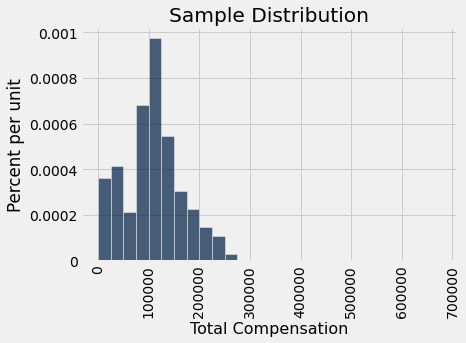

In [56]:
our_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Sample Distribution');

**Question:** How far off is our estimate from the true median?

In [85]:
pop_median, estimate_median, abs(pop_median - estimate_median)

(98174.9, 108824.46, 10649.560000000012)

## Variability of the Estimate

Let's implement the following function:

<details>
<summary>Solution</summary>
  our_sample = sf.sample(samp_size, with_replacement=False)
  return percentile(50, our_sample.column('Total Compensation'))
</details>


In [81]:
def generate_sample_median(samp_size):
    """
    Given a sample size
    Returns the median of a random sample of samp_size from the sf table"""
    # Question: sample with or without replacement?

sample_median = generate_sample_median(300)
sample_median

93766.69

**Question:** What is our error?


<details>
<summary>Solution</summary>
  error = sample_median - pop_median
</details>



In [72]:
error = ...
error

Ellipsis

(back to slides)
# Quantifying Uncertainty

In [82]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(300)
    sample_medians = np.append(sample_medians, new_median)
sample_medians

array([ 96716.87, 101019.03, 107714.97,  90716.48, 101133.34,  96378.23,
       100145.02,  93572.76,  97697.5 ,  97515.39,  98001.22, 104698.19,
       100251.4 ,  95066.93,  94461.5 , 100251.4 , 101134.44,  92416.71,
       100084.82,  99416.28,  98391.8 ,  93595.87,  94094.1 ,  94847.13,
        97303.41,  94604.21,  97085.83,  90712.33,  99315.04,  98765.03,
       103256.77,  97692.92,  99534.07,  97705.68,  88969.05,  95909.91,
        98424.91, 100776.52, 107271.88, 101923.52,  95393.47,  91083.14,
        96661.73,  94918.12, 105537.74,  97756.76,  96132.98,  96612.23,
        98090.73,  93671.16,  99043.84,  99774.84,  97549.28,  98978.43,
        98205.69,  91272.37,  97946.35,  95711.39, 108577.31, 100567.56,
        89885.05, 107861.89,  94306.67,  97906.63,  96873.71,  96963.95,
       102803.61,  97380.11,  97941.65,  92163.57,  89719.79,  94966.13,
       101409.07,  95320.01, 101724.81, 102803.61,  98948.47, 100681.46,
       101145.76,  97357.33, 103066.82,  95191.83, 

/opt/anaconda3/envs/bc-coms-1016/lib/python3.8/site-packages/datascience/tables.py:3220: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


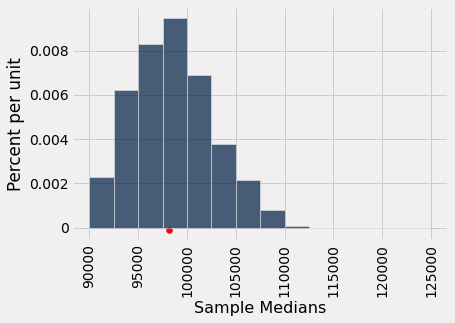

In [83]:
med_bins = np.arange(90000, 125001, 2500)
Table().with_column(
    'Sample Medians', sample_medians
).hist(bins = med_bins)

plots.scatter(pop_median, -1e-6, color="red");

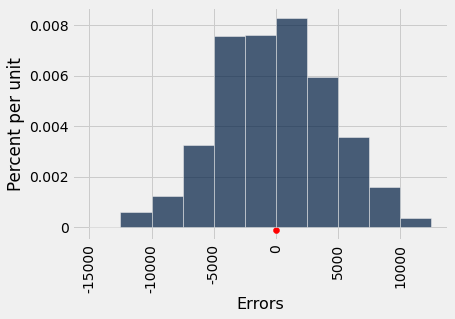

In [84]:
err_bins = np.arange(-15000, 12501, 2500)
Table().with_column(
    'Errors', sample_medians - pop_median
).hist(bins = err_bins)

plots.scatter(0, -1e-6, color="red");